In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_loaders import model_names
from data_loaders import load_da

Using custom matplotlib style from 'mplstyle' file


Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.


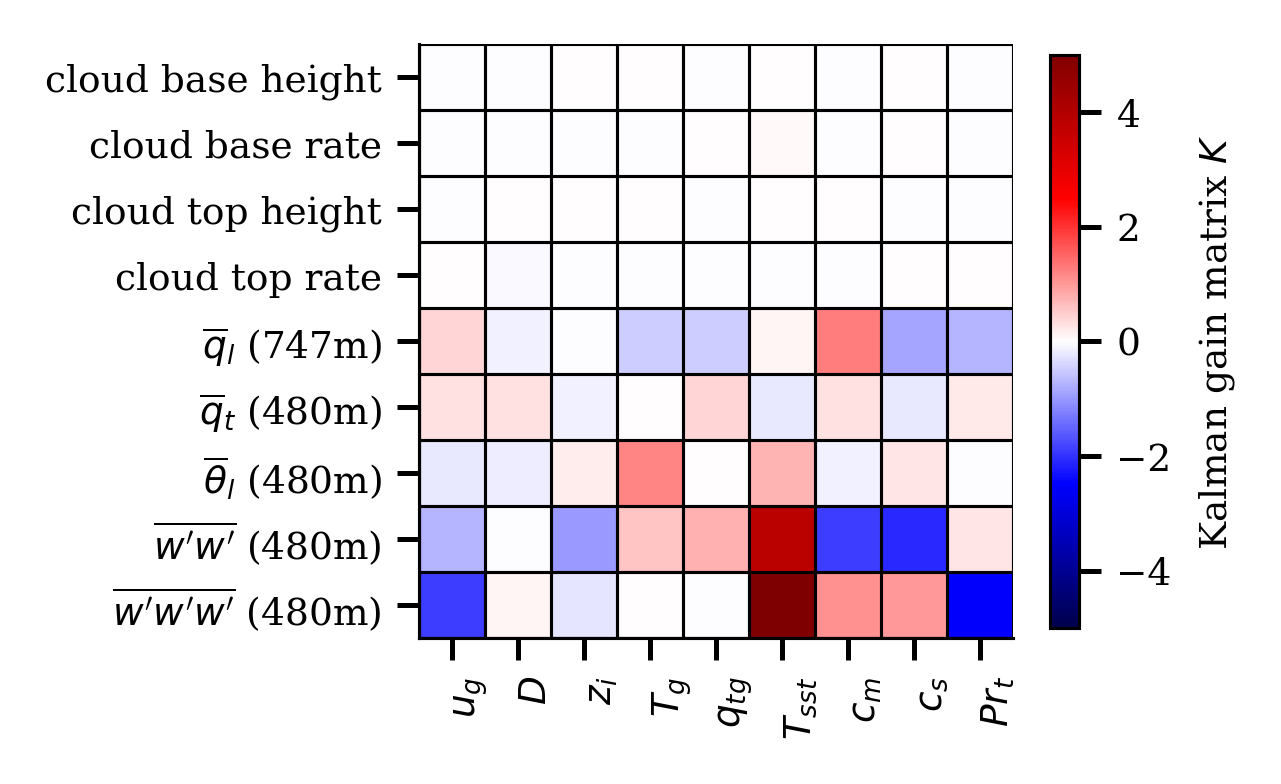

Saved figure  figs/WENO_FULLRES/REAL/matrices_excerpts/fig-heatmap__K


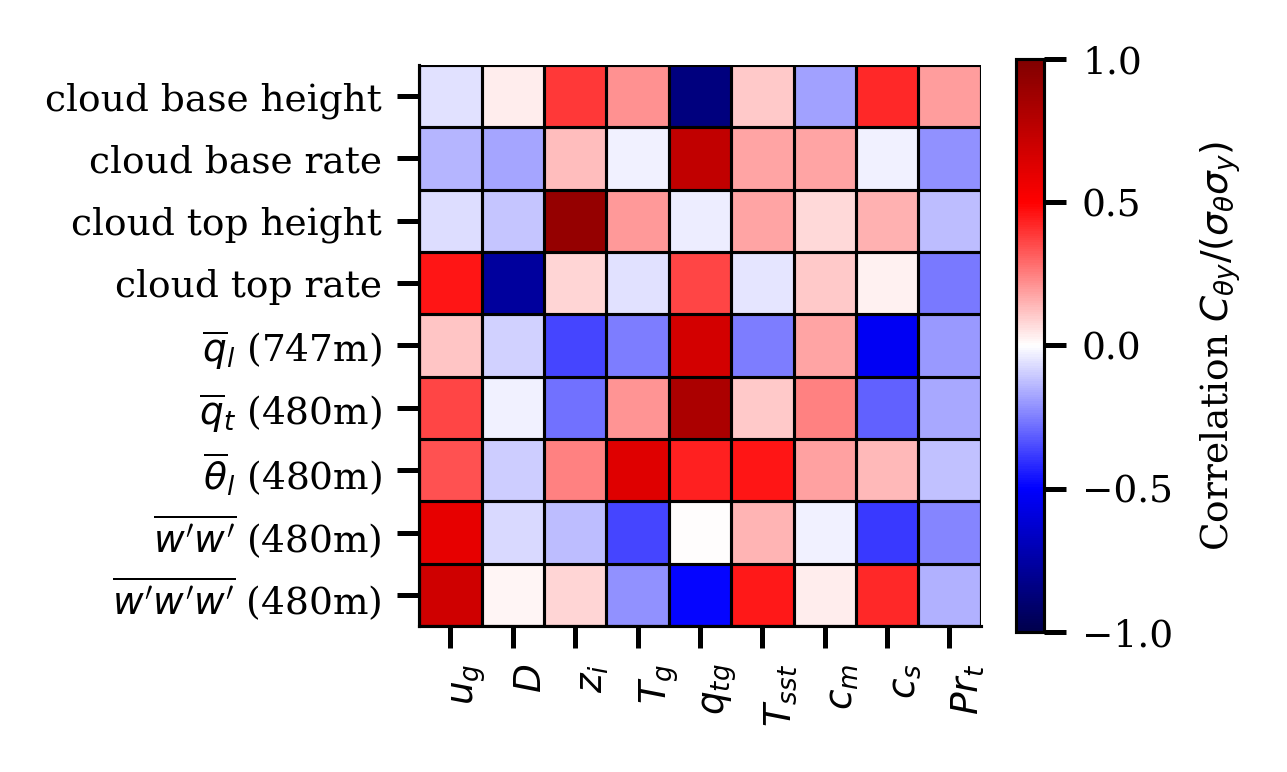

Saved figure  figs/WENO_FULLRES/REAL/matrices_excerpts/fig-heatmap__Corr_xy


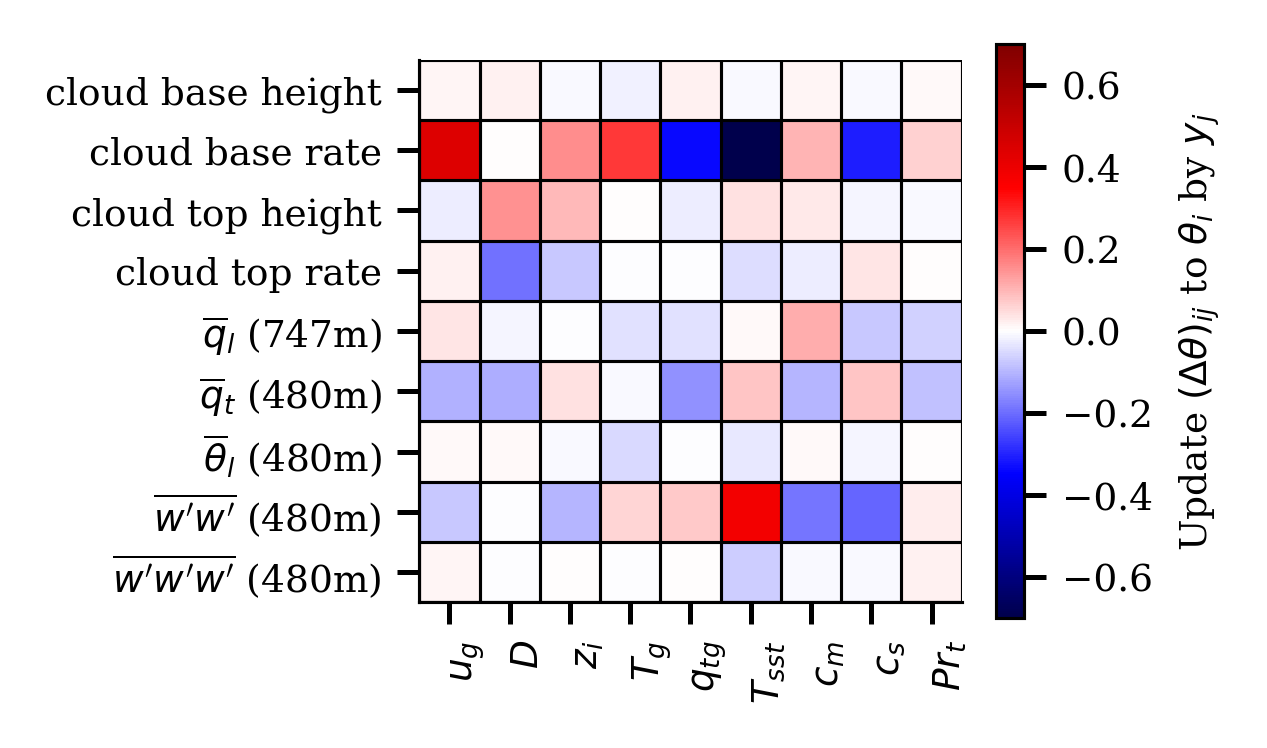

Saved figure  figs/WENO_FULLRES/REAL/matrices_excerpts/fig-heatmap__partial_updates


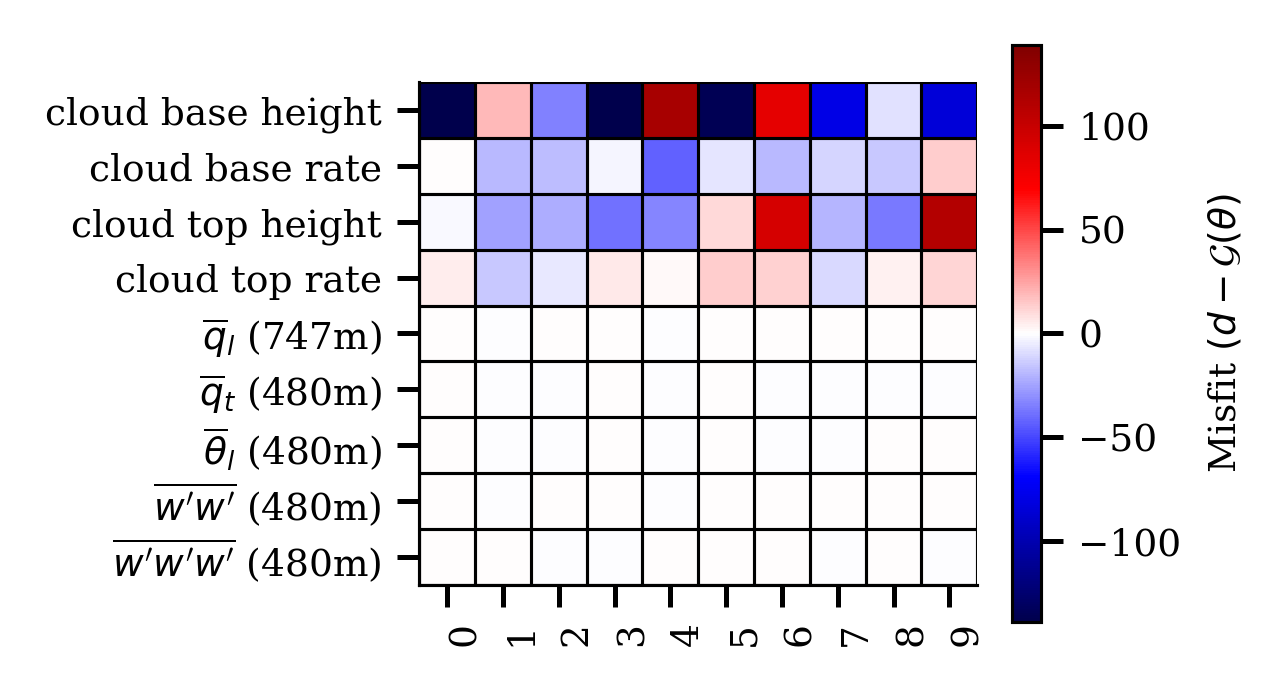

Saved figure  figs/WENO_FULLRES/REAL/matrices_excerpts/fig-heatmap__misfit


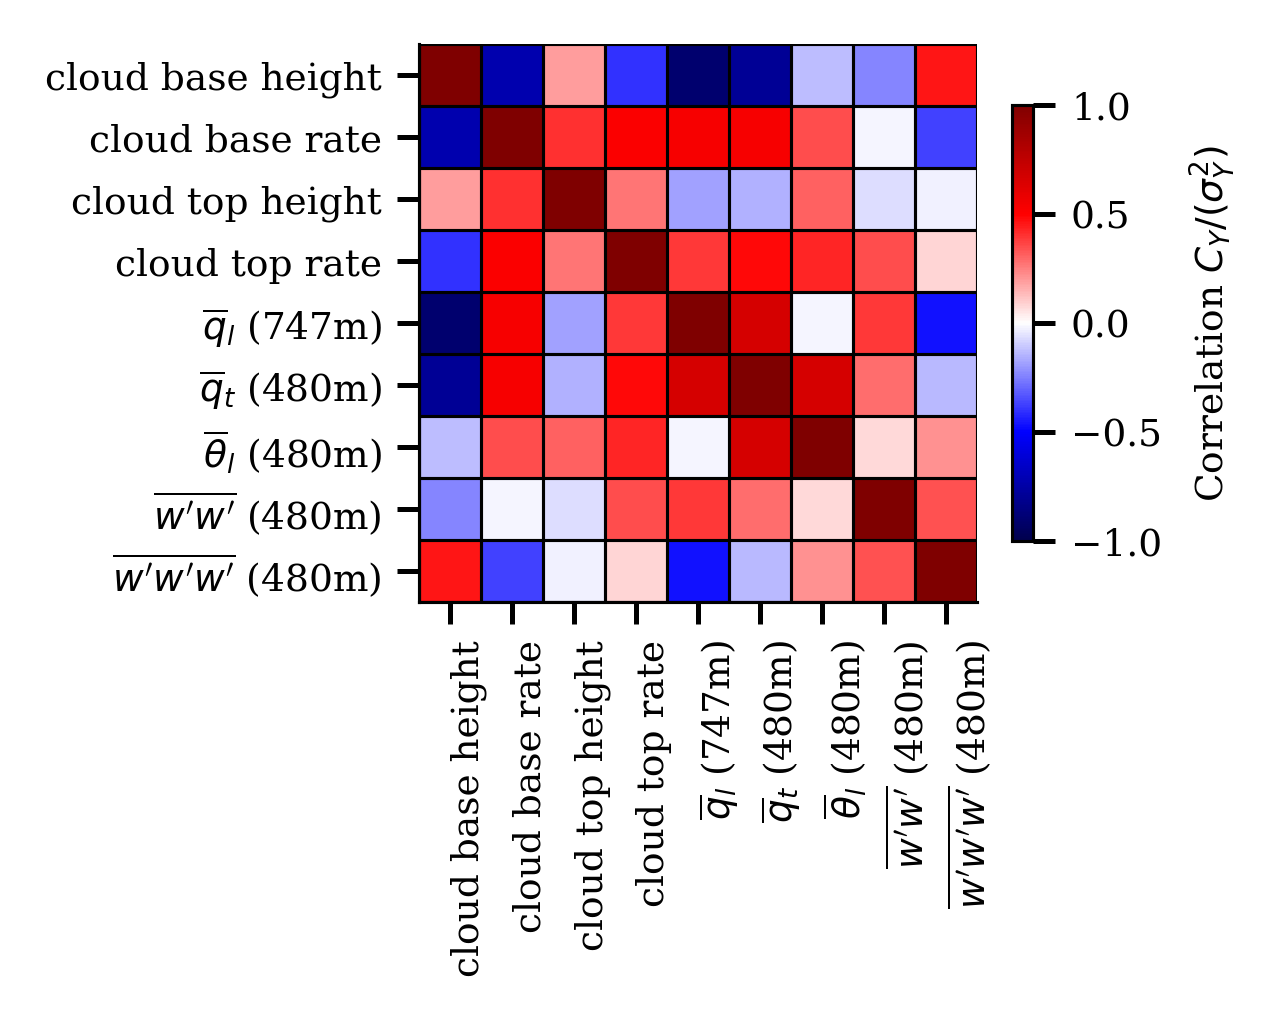

Saved figure  figs/WENO_FULLRES/REAL/matrices_excerpts/fig-heatmap__Corr_y


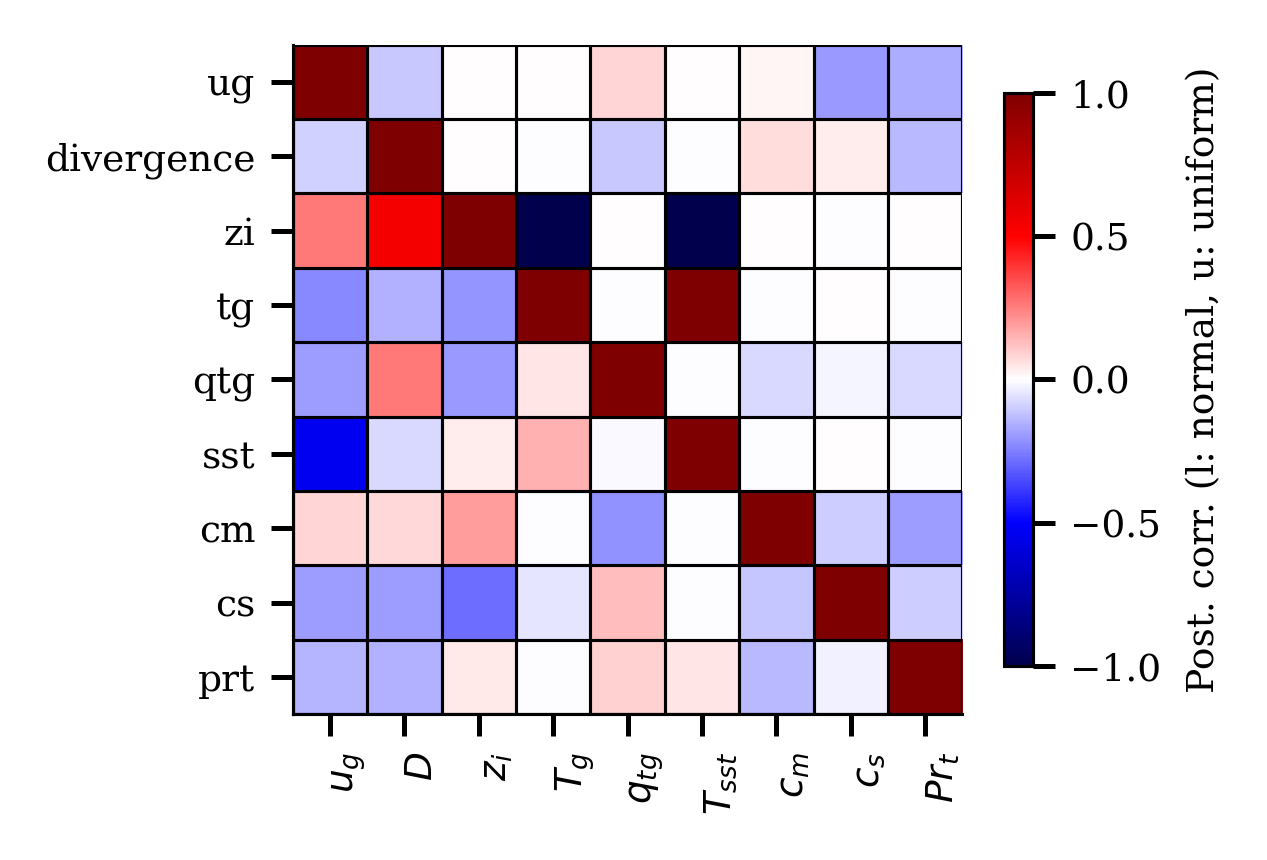

Saved figure  figs/WENO_FULLRES/REAL/matrices_excerpts/fig-heatmap__post_corr_transform
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_observations.nc.


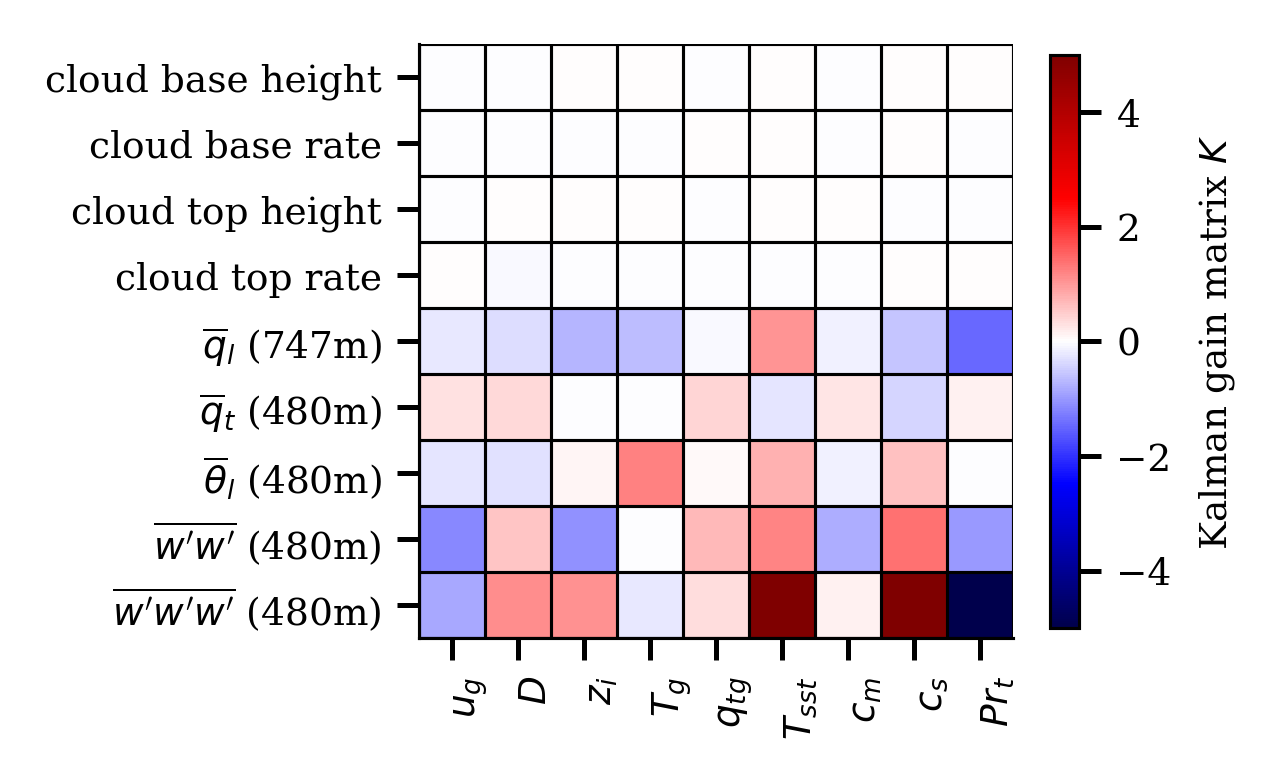

Saved figure  figs/WENO_LOWRES/REAL/matrices_excerpts/fig-heatmap__K


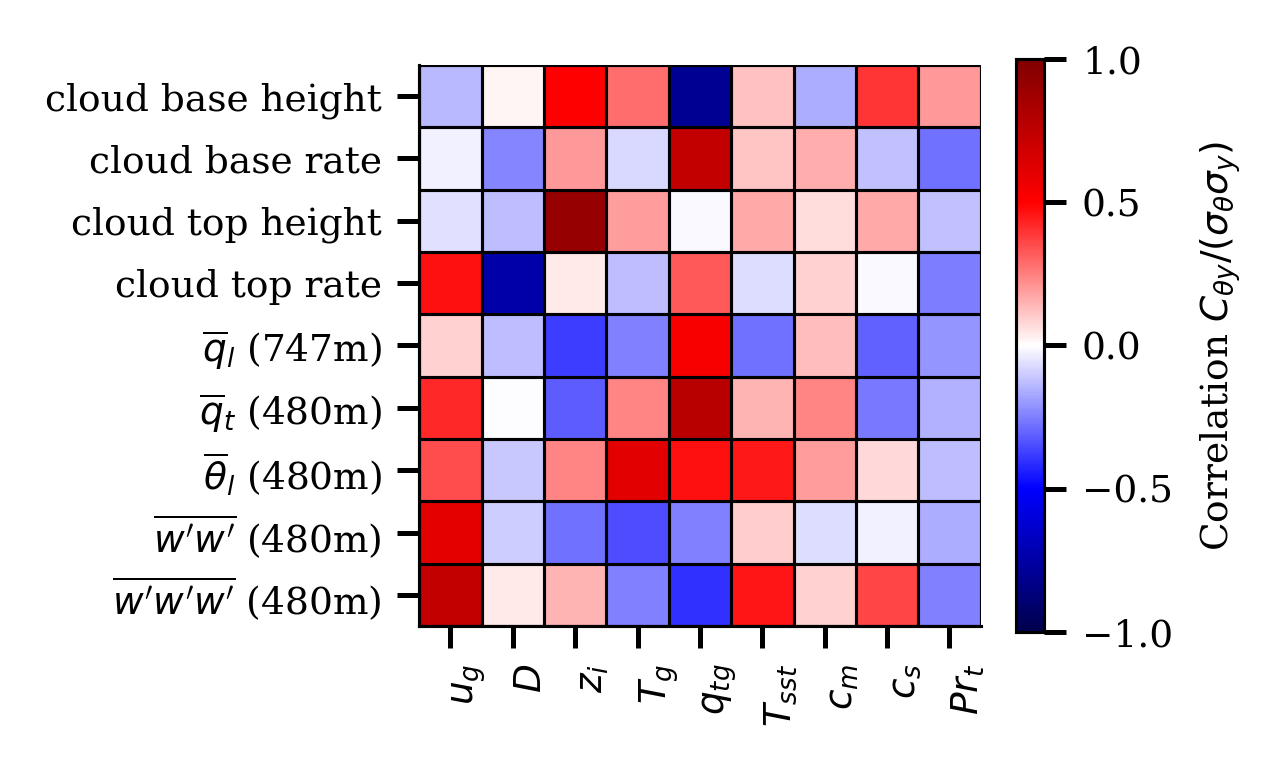

Saved figure  figs/WENO_LOWRES/REAL/matrices_excerpts/fig-heatmap__Corr_xy


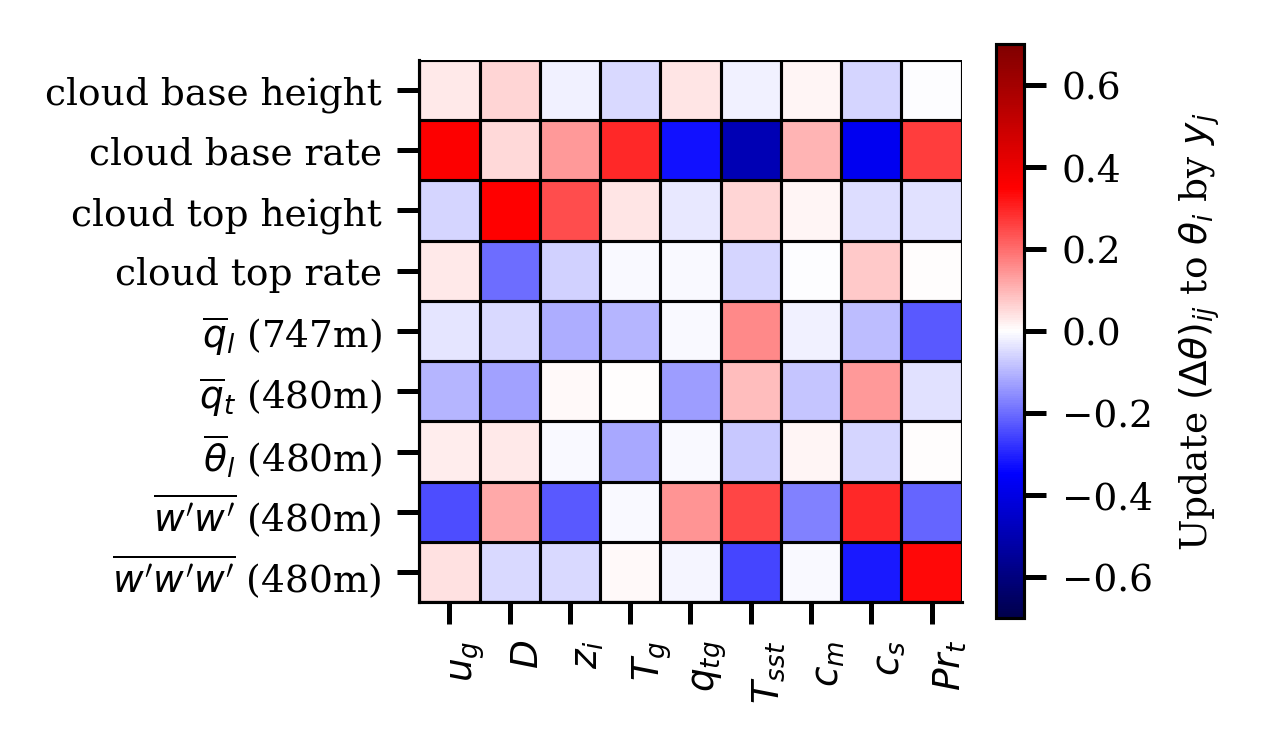

Saved figure  figs/WENO_LOWRES/REAL/matrices_excerpts/fig-heatmap__partial_updates


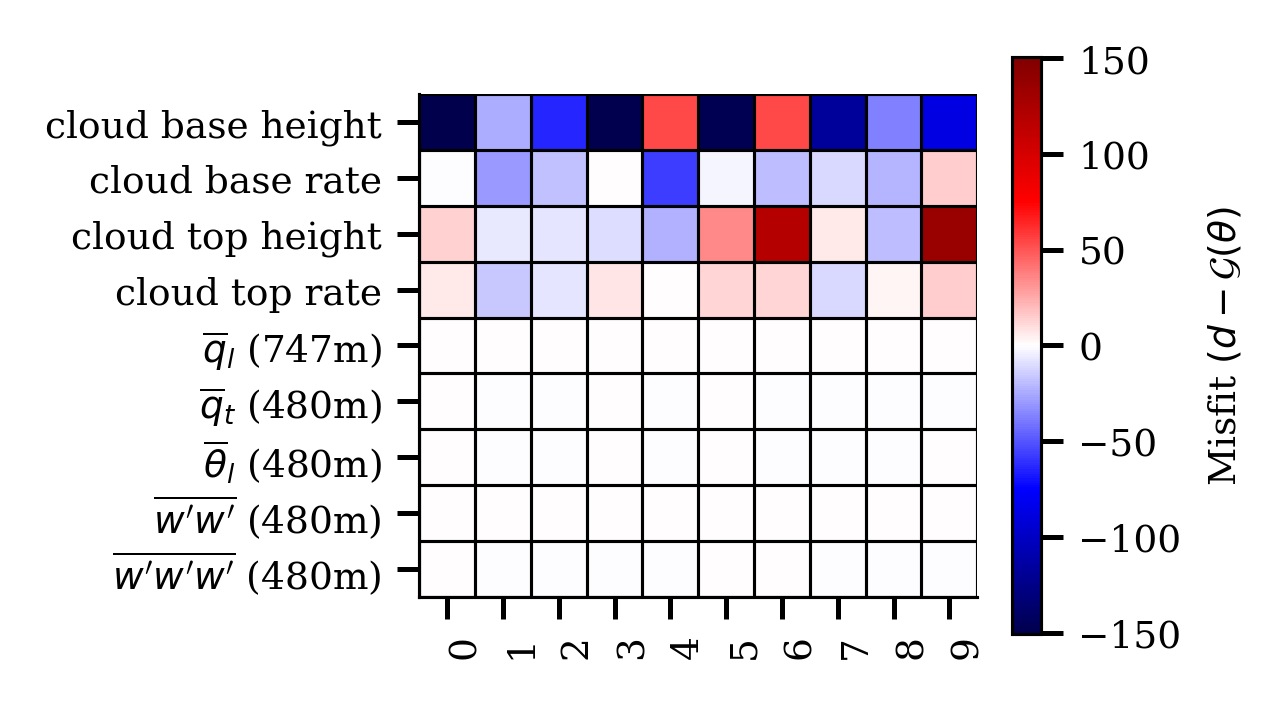

Saved figure  figs/WENO_LOWRES/REAL/matrices_excerpts/fig-heatmap__misfit


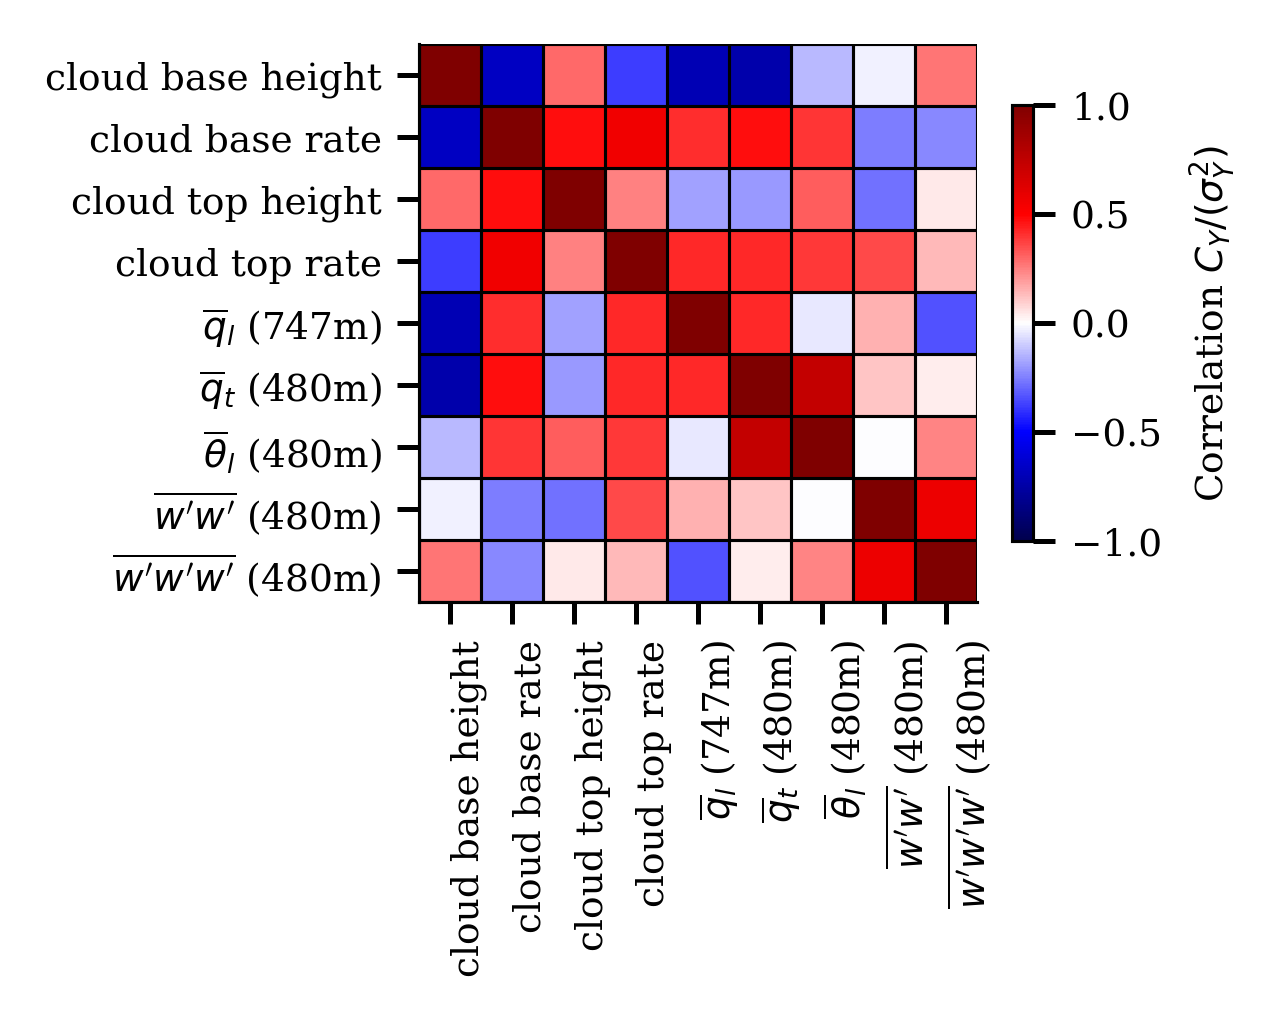

Saved figure  figs/WENO_LOWRES/REAL/matrices_excerpts/fig-heatmap__Corr_y


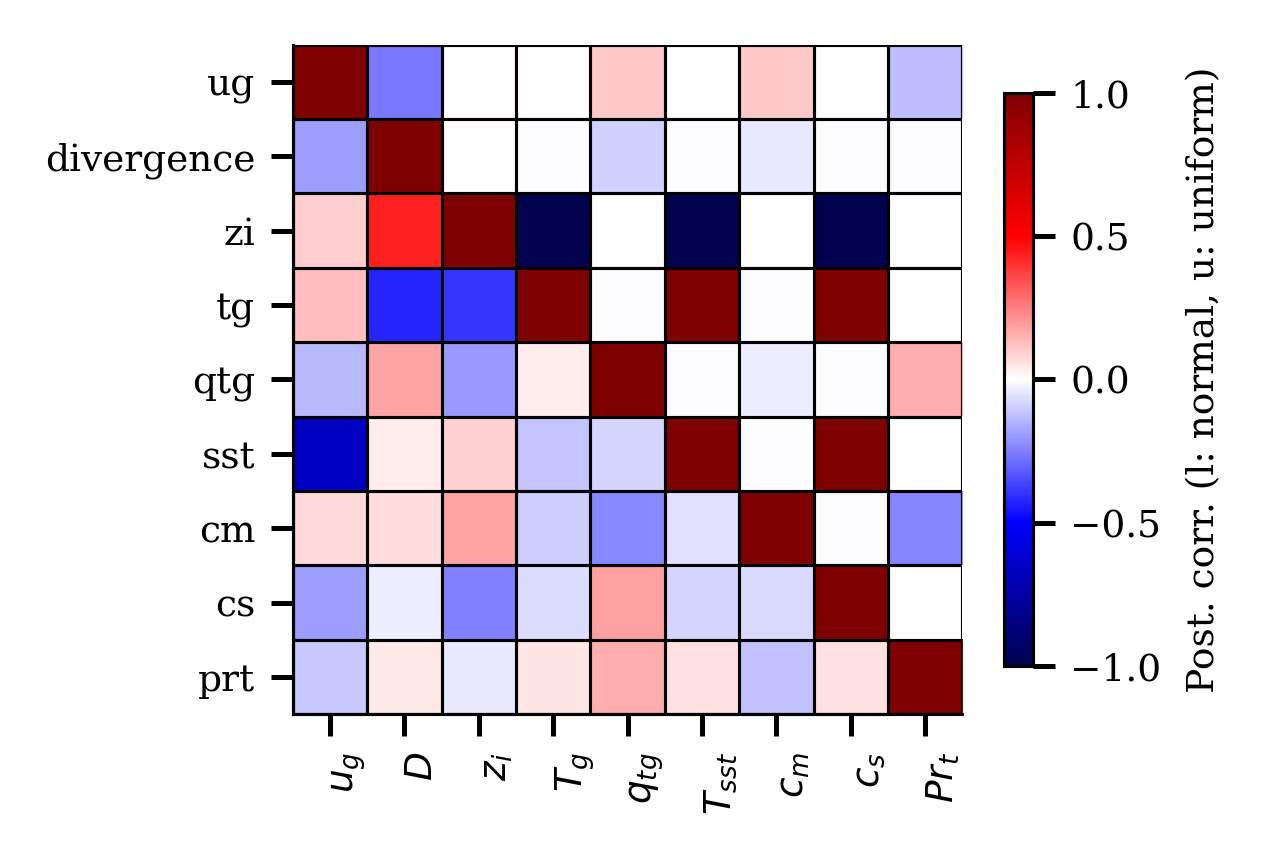

Saved figure  figs/WENO_LOWRES/REAL/matrices_excerpts/fig-heatmap__post_corr_transform
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/MIXED_FULLRES/DYCOMS_RF01_N64/samples_observations.nc.


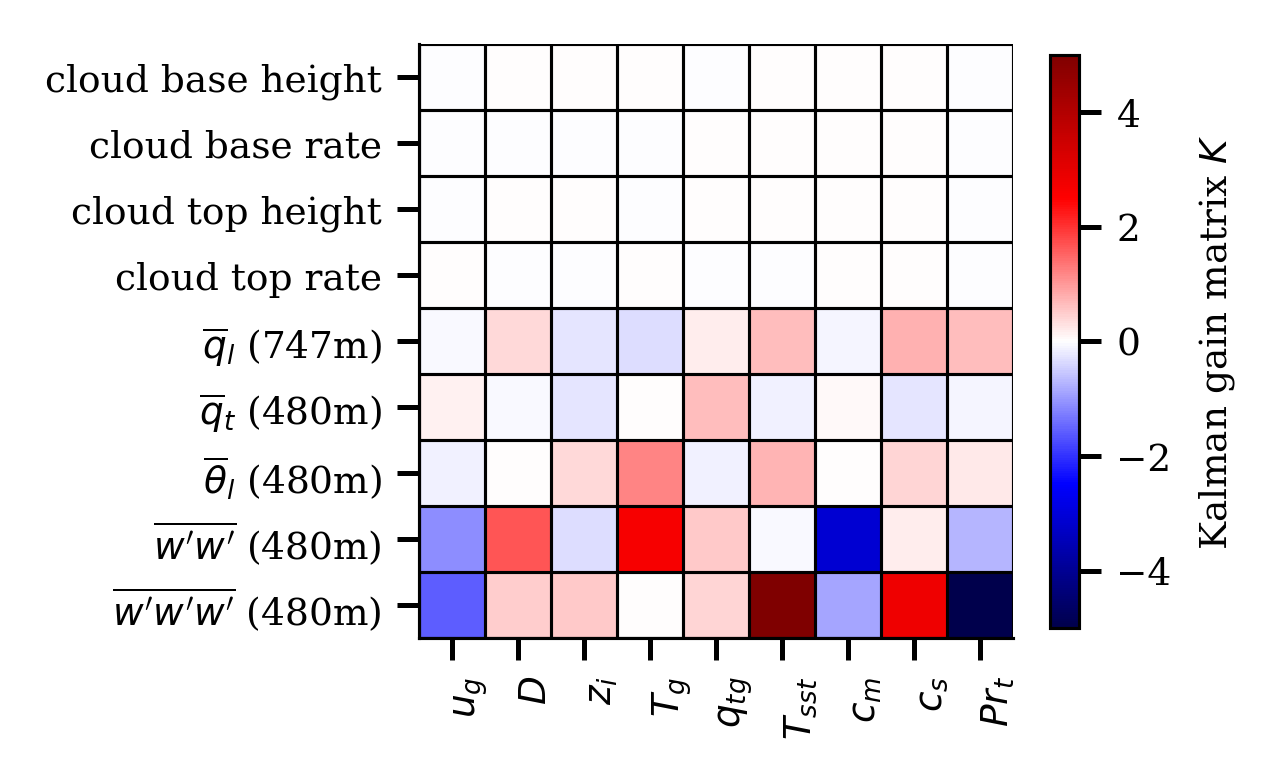

Saved figure  figs/MIXED_FULLRES/REAL/matrices_excerpts/fig-heatmap__K


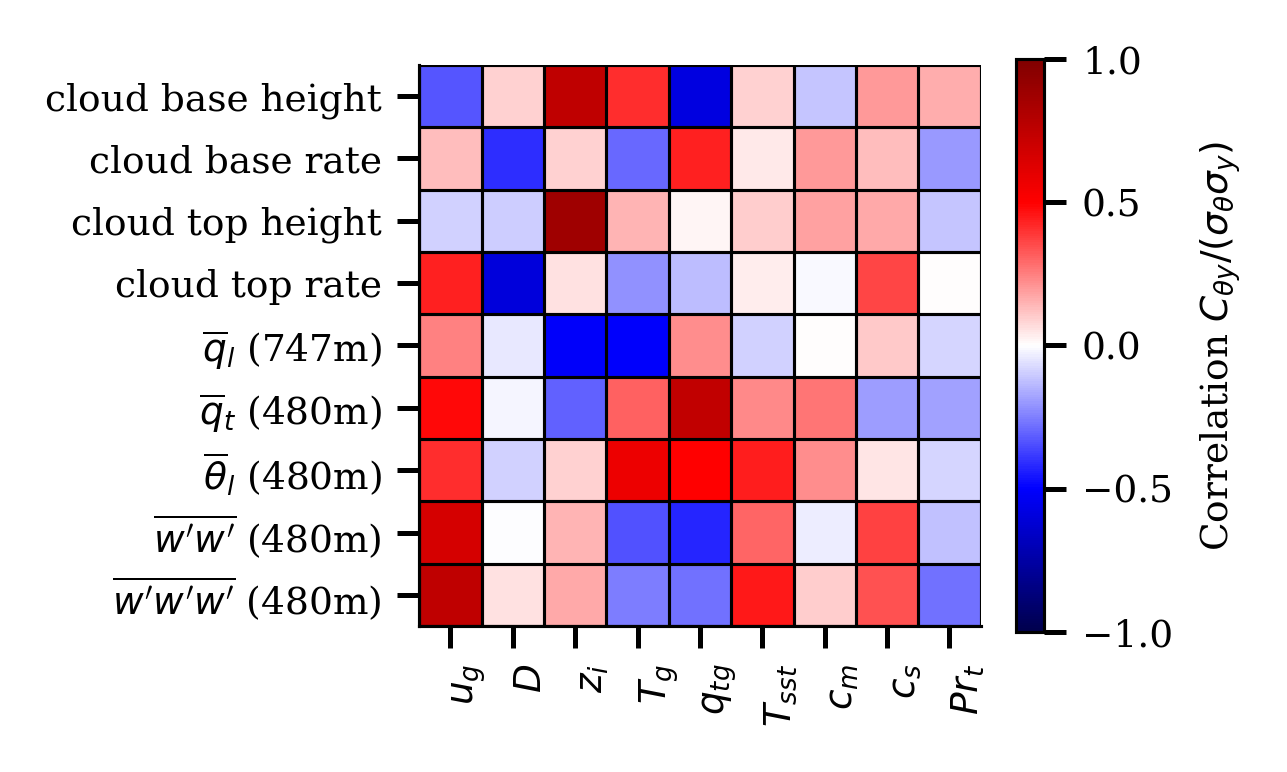

Saved figure  figs/MIXED_FULLRES/REAL/matrices_excerpts/fig-heatmap__Corr_xy


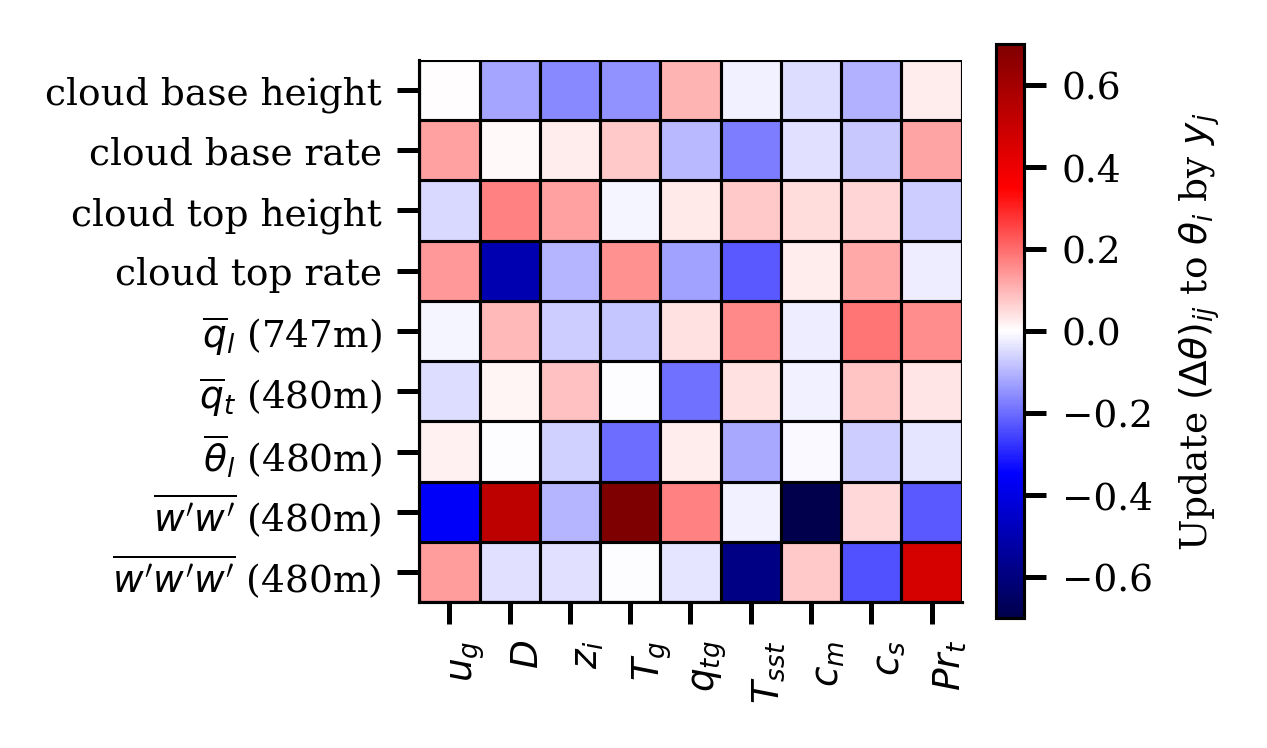

Saved figure  figs/MIXED_FULLRES/REAL/matrices_excerpts/fig-heatmap__partial_updates


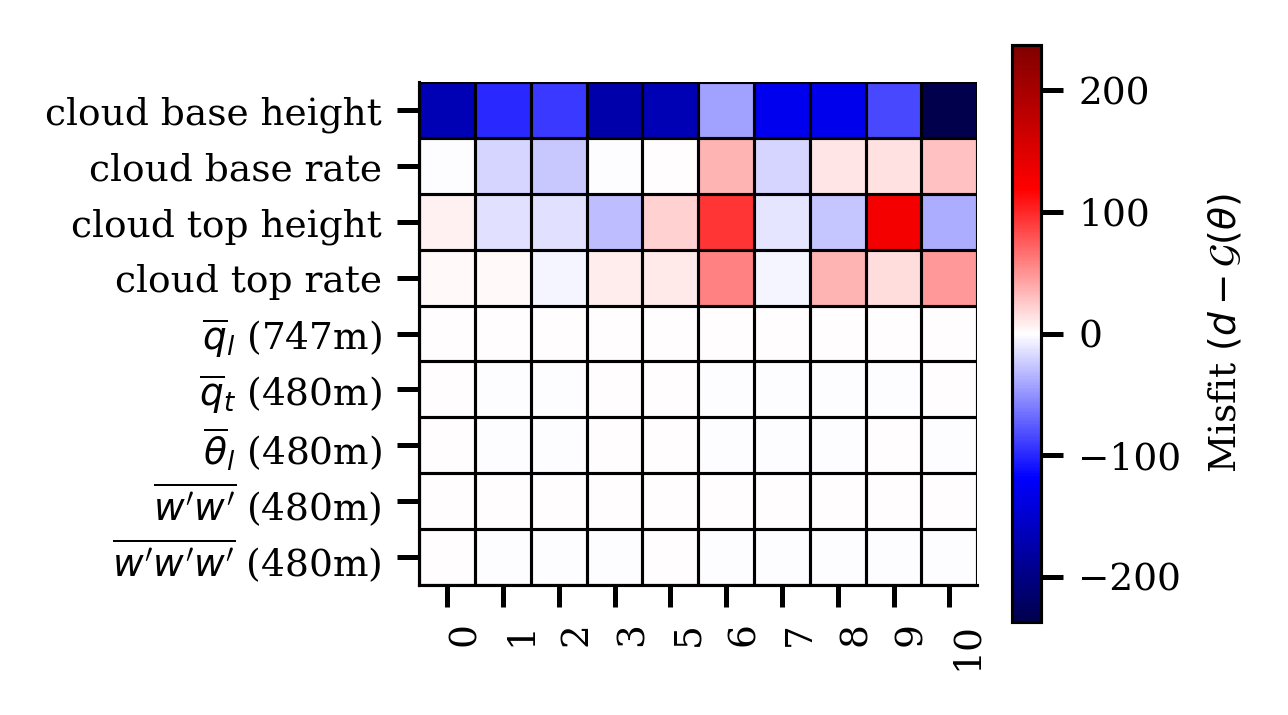

Saved figure  figs/MIXED_FULLRES/REAL/matrices_excerpts/fig-heatmap__misfit


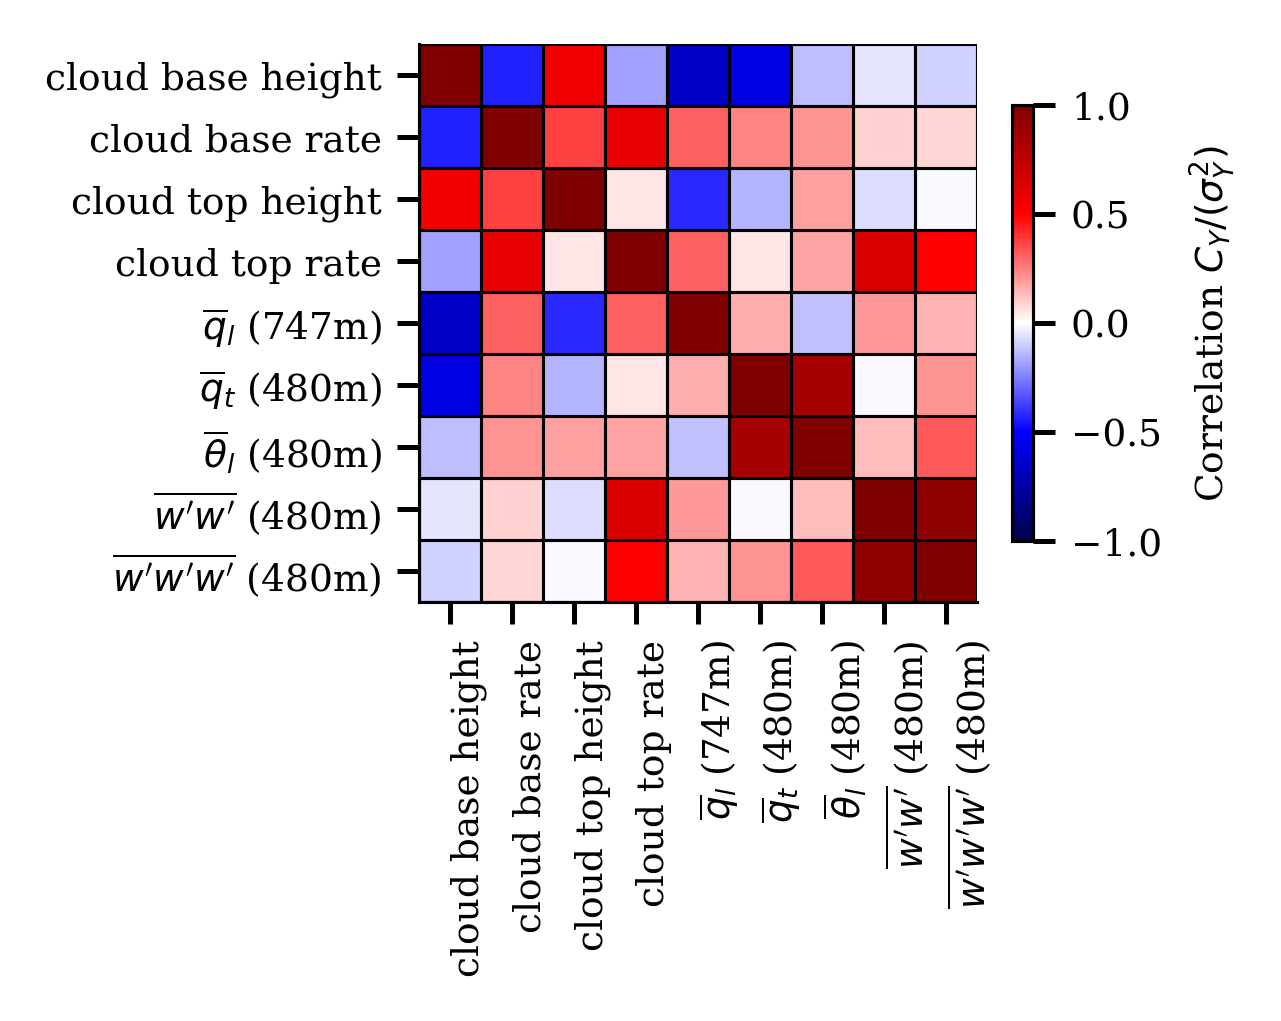

Saved figure  figs/MIXED_FULLRES/REAL/matrices_excerpts/fig-heatmap__Corr_y


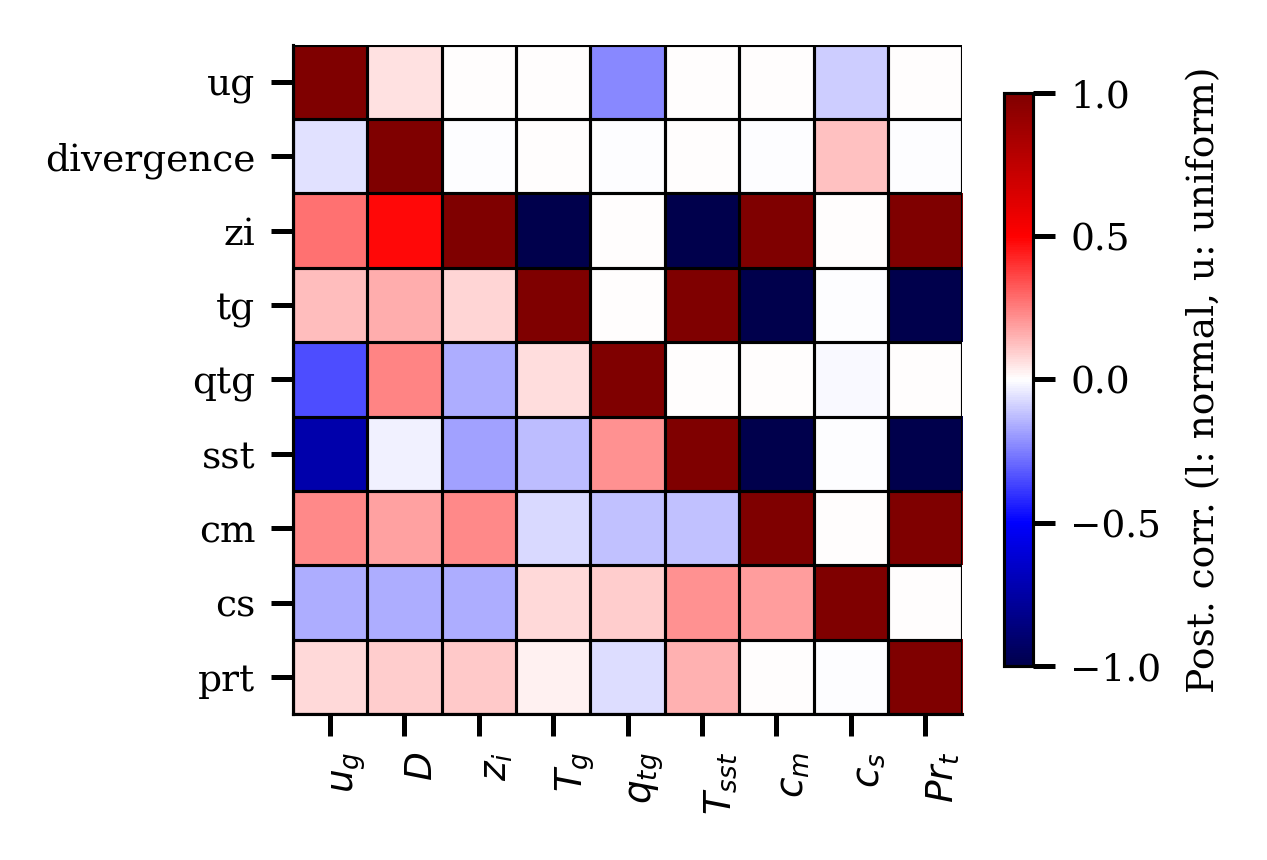

Saved figure  figs/MIXED_FULLRES/REAL/matrices_excerpts/fig-heatmap__post_corr_transform
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/CENTRAL_FULLRES/DYCOMS_RF01_N64/samples_observations.nc.


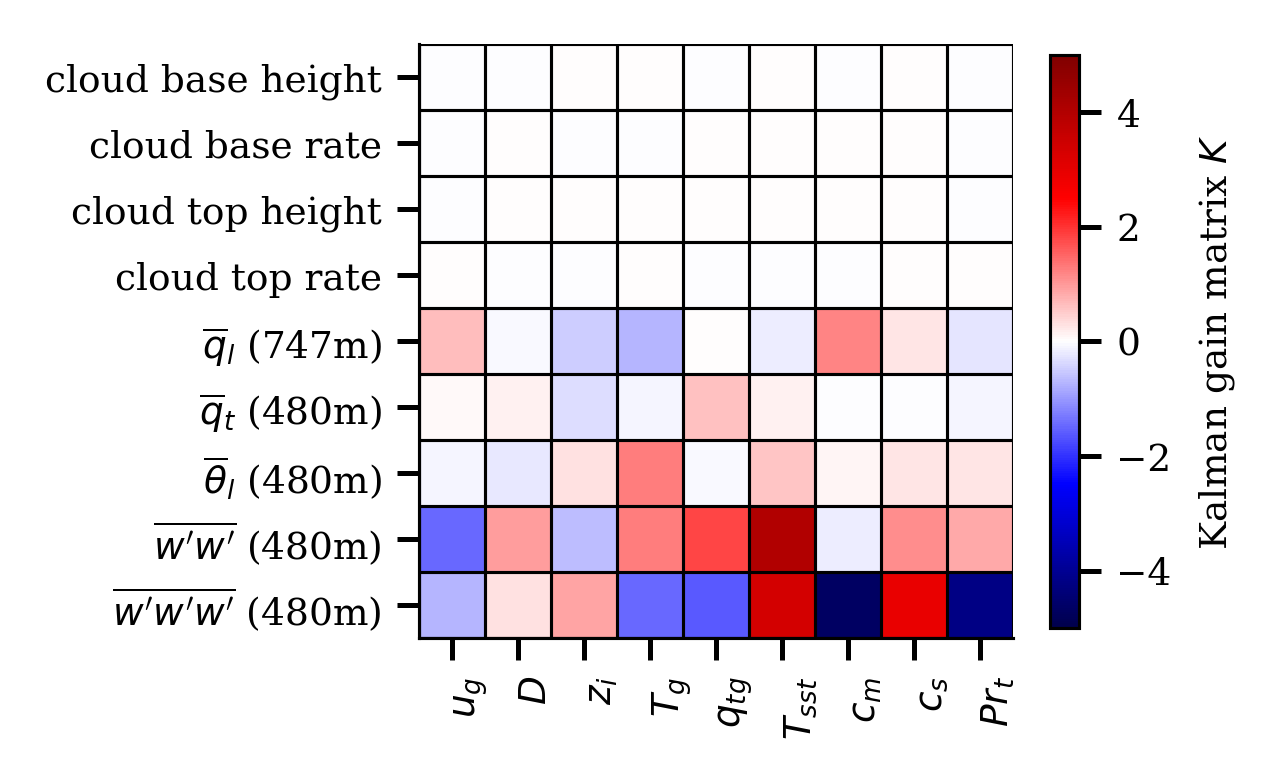

Saved figure  figs/CENTRAL_FULLRES/REAL/matrices_excerpts/fig-heatmap__K


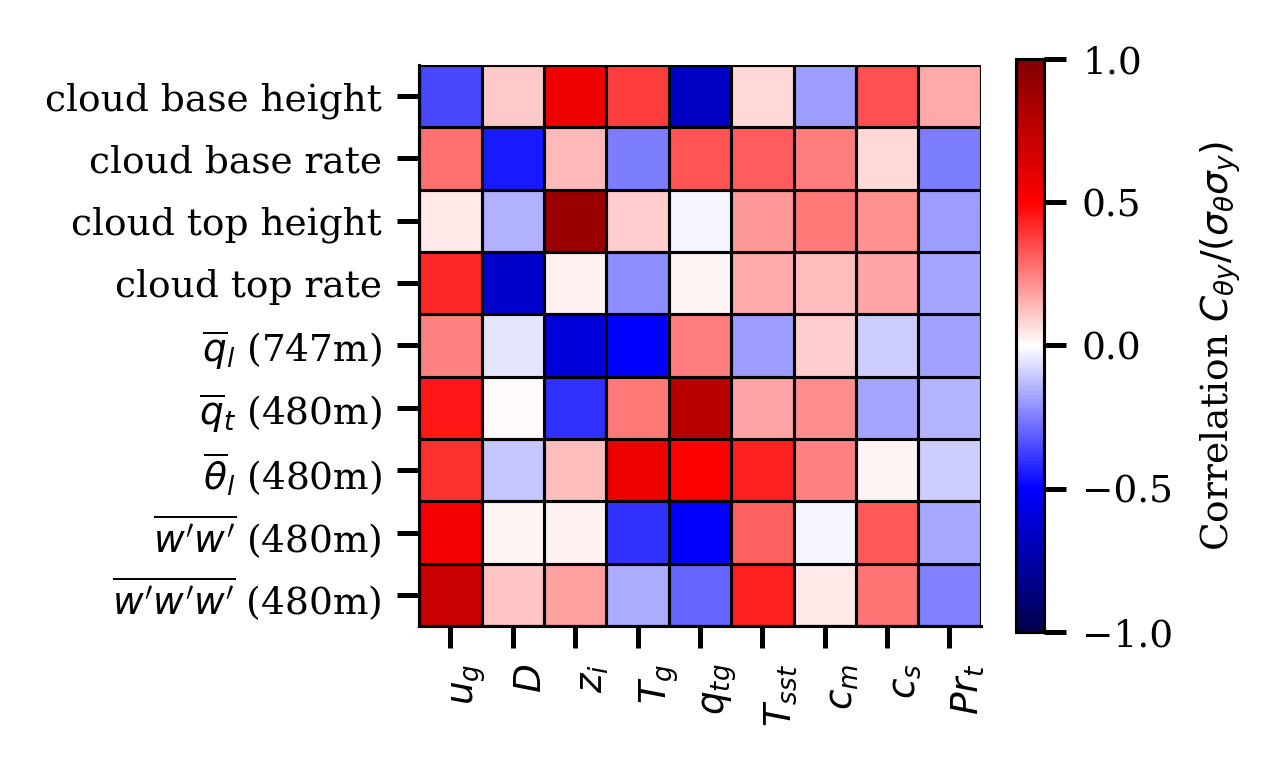

Saved figure  figs/CENTRAL_FULLRES/REAL/matrices_excerpts/fig-heatmap__Corr_xy


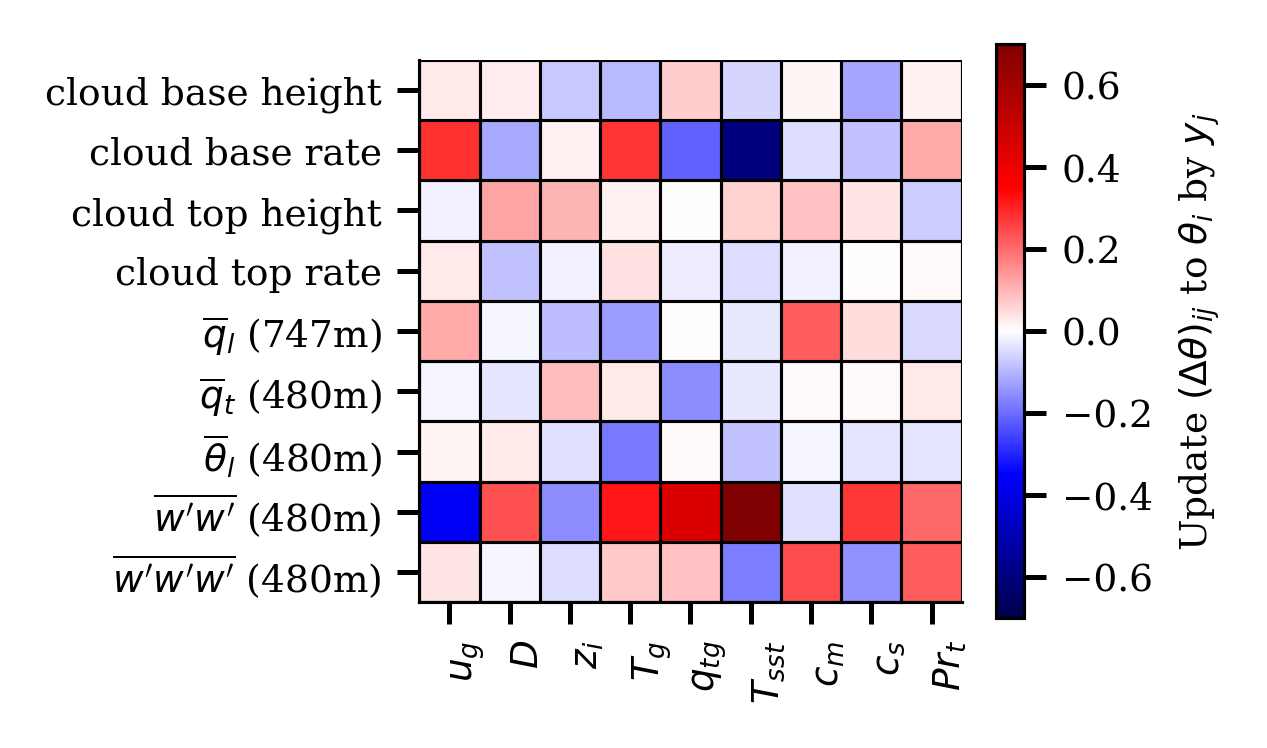

Saved figure  figs/CENTRAL_FULLRES/REAL/matrices_excerpts/fig-heatmap__partial_updates


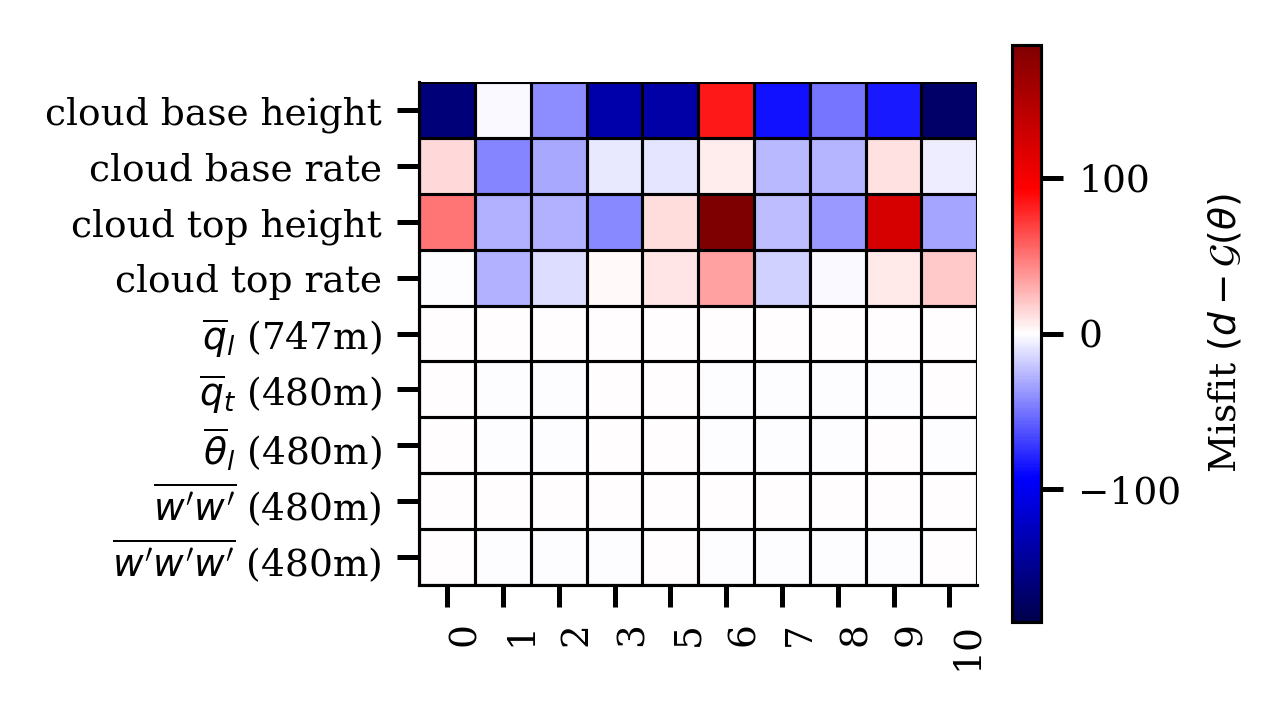

Saved figure  figs/CENTRAL_FULLRES/REAL/matrices_excerpts/fig-heatmap__misfit


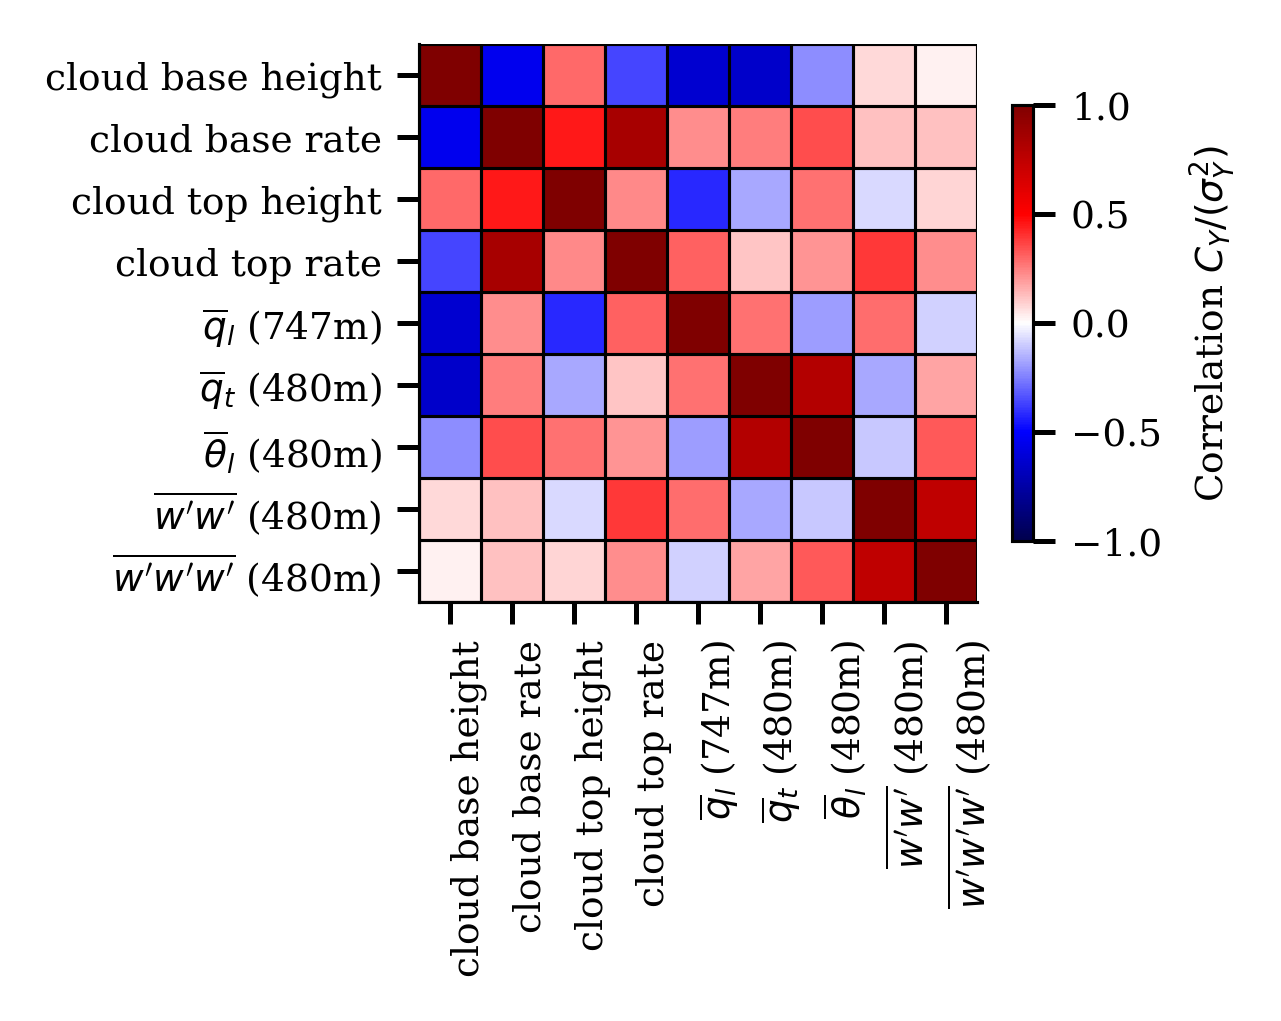

Saved figure  figs/CENTRAL_FULLRES/REAL/matrices_excerpts/fig-heatmap__Corr_y


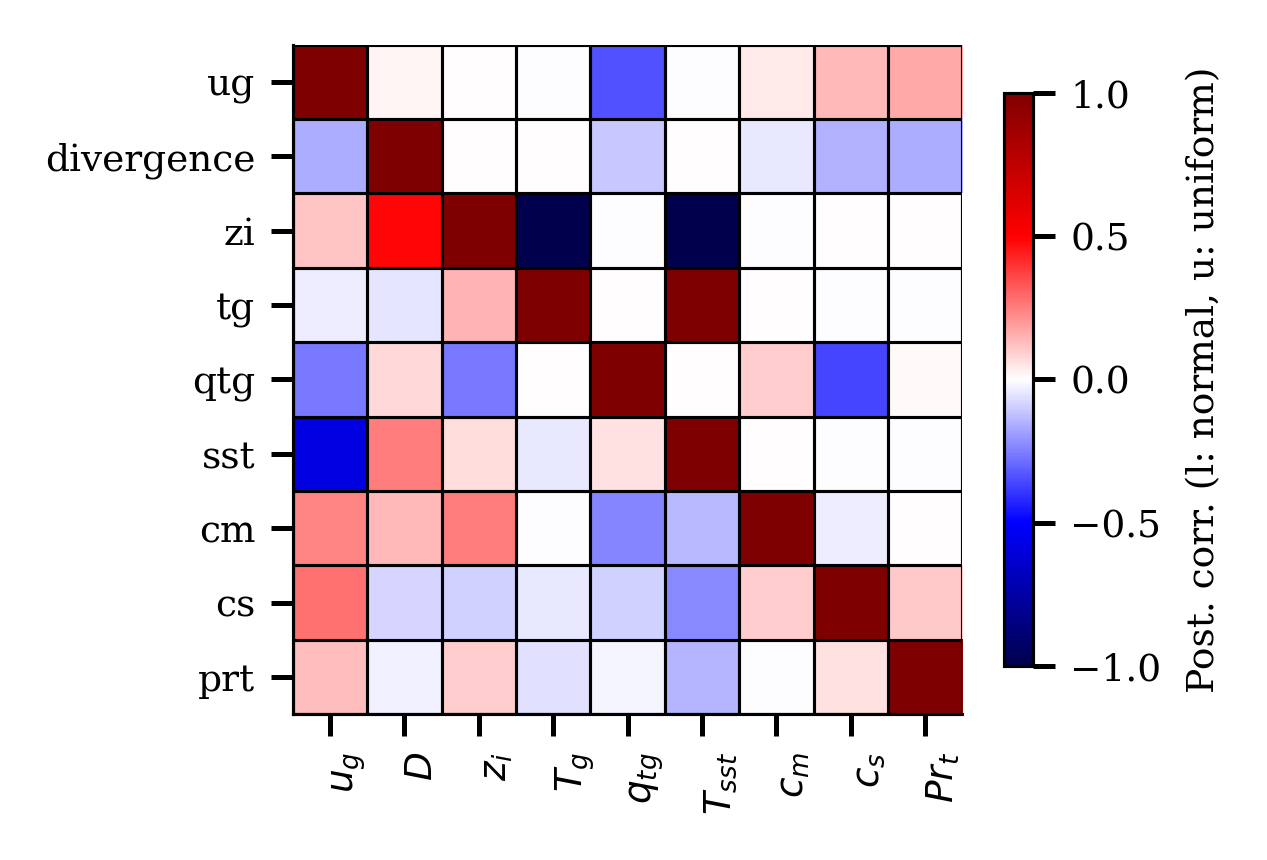

Saved figure  figs/CENTRAL_FULLRES/REAL/matrices_excerpts/fig-heatmap__post_corr_transform


In [5]:
# run and plot DA

for model_name in model_names:
    
    DA = load_da(model_name, synthetic=False)
    
    # DA.plot_1d_dists()
    
    DA.plot_matrices(excerpt=True)
    # DA.plot_matrices(excerpt=False)

In [5]:
### run posterior mode sample

model_name = "WENO_FULLRES"
meas_name = ""  # default measurements
DA = load_da(model_name, synthetic=False)

import os
from calpycles.pycles_sample import SampleDYCOMS_RF01
from data_loaders import make_namelist_settings

# location
this_path = os.path.abspath("")
data_folder = os.path.join(this_path,"data/")
name = "mode" # sample name, same for all


sample = SampleDYCOMS_RF01(
    name=name,
    parent_path=os.path.join(data_folder, model_name, "REAL"),
    namelist_settings=make_namelist_settings(model_name)
)

# set custom parameters
mode_c = DA.get_posterior_mode(constrained=True)
print(mode_c)
sample.parameters.set_from_np(mode_c)

sample.namelist.update({
    "mpi": {
        "nprocx": 64,  # takes about 3h on 64 cores
    }
})

sample.namelist.write()

sample.run(
    submit_job= True,
    do_wait_to_finish = False,  # cant do cleaning!
)

### RUNNING

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
[8.87441836e+00 3.46613878e-06 8.69971065e+02 2.89983125e+02
 8.35486747e-03 2.91429340e+02 1.02954805e-03 2.58931656e-02
 5.75298802e-01]
Submitted batch job 51982890


In [10]:
# after running, finish up
from data_loaders import load_mode

model_name = "WENO_FULLRES"
mode = load_mode(model_name,meas_name="REAL")
# mode.clean_files(**{
#         # for nature, keep all information
#         "delete_fields": False,
#         "select_stats": False,
#         "delete_cond_stats": False,
# })
# mode.observable.observe()

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Reading full profiles and timeseries for ObEnsembleDYCOMS_RF01...
	[create_mfdataset_with_nans()] Found 1 files.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 1 files.


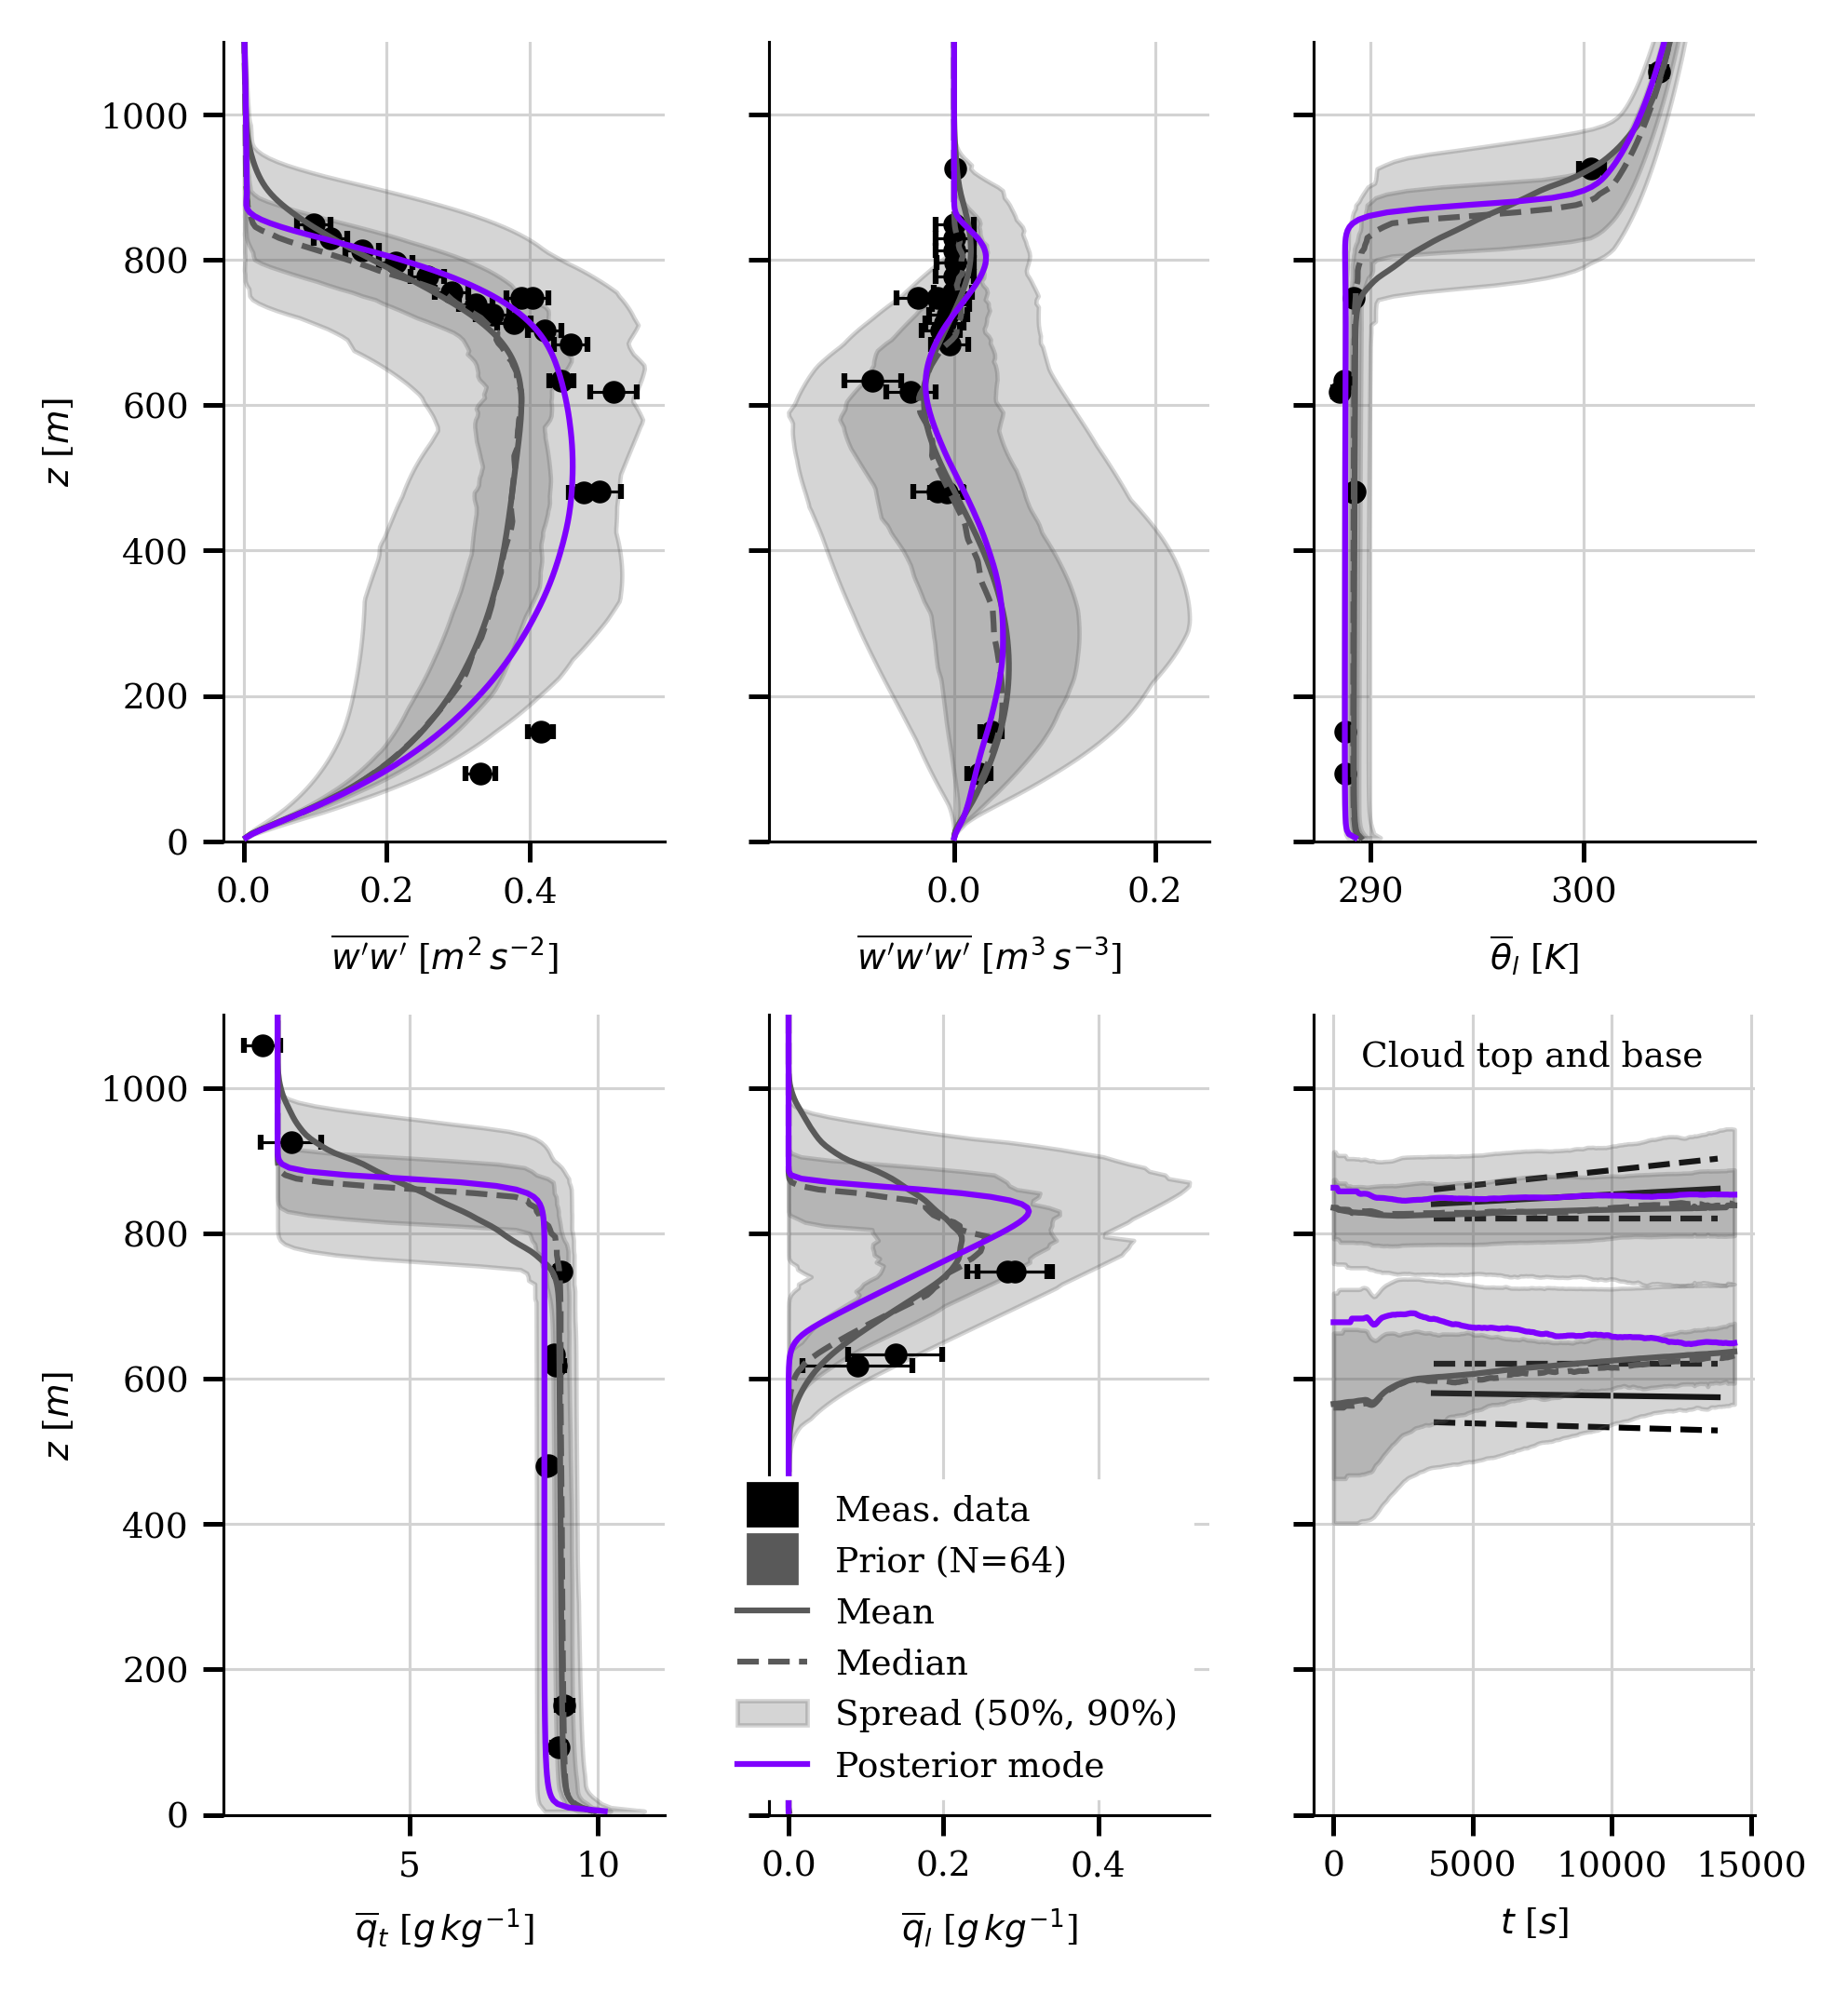

Saved figure  figs/WENO_FULLRES/REAL/fig-obs_prior_WENO_FULLRES_mode


In [12]:
### TO DO: ADD NATURE AS WELL
model_name = "WENO_FULLRES"

from calpycles.DYCOMS_RF01.measurements import MeasurementsDYCOMS_RF01
meas = MeasurementsDYCOMS_RF01()
meas_name="REAL"

from data_loaders import load_ens
ens = load_ens(model_name)

from data_loaders import load_mode
mode = load_mode(model_name,meas_name=meas_name)

from calpycles.plotting.ens_obs import plot_ens_obs
plot_ens_obs(
    ensembles=[ens],
    ens_labels=["Prior (N=64)"],
    data=meas,
    nature=mode,
    nature_name="Posterior mode",
    save_file=f"figs/{model_name}/{meas_name}/fig-obs_prior_{model_name}_mode",
    cloud_height_type="mean",
)